In [1]:
%matplotlib inline

In [2]:
import numpy as np  
import matplotlib.pyplot as plt  

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures 
from sklearn.linear_model import LinearRegression  
from sklearn.model_selection import cross_val_score 


np.random.seed(0)  

In [3]:
def gen_target(X):
    return np.cos(1.5 * np.pi * X)

In [4]:
n_records = 30         
degrees = [1, 4, 30]   
types = ['Underfitting', 'Perfect fitting', 'Overfitting']

In [5]:
X = np.sort(np.random.rand(n_records))   
y = gen_target(X) + np.random.randn(n_records) * 0.1  

In [6]:
def plot_test(X, y, deg, title=""):
    X_test = np.linspace(0, 1, 100)
    plt.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), label="LR function (deg="+str(deg)+")")
    plt.plot(X_test, gen_target(X_test), '--r', label="True function")
    plt.scatter(X, y, facecolor="b", s=20, label="Training records")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.xlim((0, 1))
    plt.ylim((-2, 2))
    plt.legend(loc="best")
    plt.title(title)

Degree 1
MSE = 4.077e-01(+/- 4.255e-01) 

Degree 4
MSE = 4.321e-02(+/- 7.078e-02) 

Degree 30
MSE = 3.834e+10(+/- 1.059e+11) 



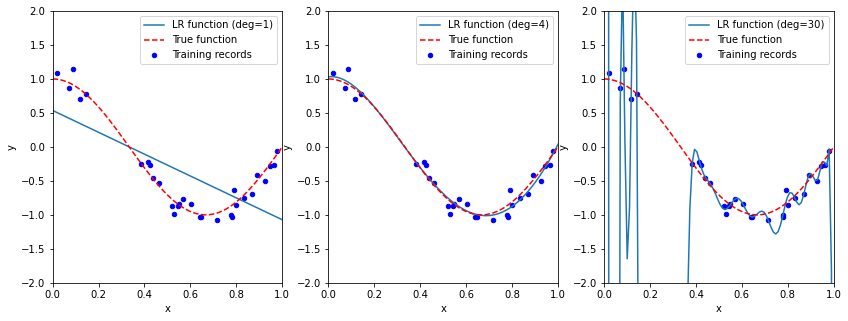

In [7]:
plt.figure(figsize=(14, 5)) 
for i, (deg, t) in enumerate(zip(degrees, types)):
    ax = plt.subplot(1, len(degrees), i + 1)  

    poly_feat = PolynomialFeatures(degree=degrees[i], include_bias=False)
    lr = LinearRegression()
    
    # Make regression pipeline
    pipeline = Pipeline([("poly_feat", poly_feat),("lr", lr),])
    pipeline.fit(X[:, np.newaxis], y)

    # Evaluate the models using 10-fold cross-validation and MSE
    scores = cross_val_score(pipeline, X[:, np.newaxis], y, scoring="neg_mean_squared_error", cv=10)
    
    # Plot results with original data
    plot_test(X, y, deg)
    print("Degree {}\nMSE = {:.3e}(+/- {:.3e}) \n".format(deg, -scores.mean(), scores.std()))
    
plt.show()